In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

data = open('/kaggle/input/arijit4/arijit.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'ho': 1, 'hai': 2, 'tum': 3, 'hi': 4, 'tu': 5, 'main': 6, 'na': 7, 'tere': 8, 'mein': 9, 'se': 10, 'mera': 11, 'bhi': 12, 'dil': 13, 'meri': 14, 're': 15, 'o': 16, 'ke': 17, 'jo': 18, 'si': 19, 'gayi': 20, 'tera': 21, 'ab': 22, 'ye': 23, 'teri': 24, 'sanam': 25, 'ka': 26, 'ko': 27, 'hoon': 28, 'ki': 29, 'nahi': 30, 'toh': 31, 'de': 32, 'jaaye': 33, 'mere': 34, 'hua': 35, 'kyun': 36, 'kya': 37, 'saath': 38, 'chadh': 39, 'pe': 40, 'oye': 41, 'aaya': 42, 'hawayein': 43, 'mujhe': 44, 'hum': 45, 'pichhe': 46, 'yeh': 47, 'jaise': 48, 'phir': 49, 'nashe': 50, 'zindagi': 51, 'bin': 52, 'chalna': 53, 'kabhi': 54, 'dard': 55, 'mohabbat': 56, 'bada': 57, 'pachtaoge': 58, 'jaane': 59, 'har': 60, 'le': 61, 'kudi': 62, 'nahin': 63, 'aur': 64, 'maahi': 65, 'tujhe': 66, 'patang': 67, 'yaar': 68, 'twist': 69, 'bina': 70, 'agar': 71, 'lad': 72, 'chala': 73, 'zara': 74, 'chhod': 75, 've': 76, 'pucho': 77, 'ek': 78, 'hain': 79, 'aashiqui': 80, 'pyar': 81, 'ja': 82, 'karne': 83, 'zaalima': 84, 'mausam': 8

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_words, activation='softmax'))
schedule=tf.keras.callbacks.LearningRateScheduler(lambda e: 1e-4*10**(e/20))
#opt = tf.keras.optimizers.SGD(lr=0.7079,momentum=0.9)
opt=Adam(0.02)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, batch_size=128,epochs=30, verbose=1)
#print model.summary()
print(model)

Epoch 1/30
24/24 [==============================] - 0s 10ms/step - loss: 6.2298 - accuracy: 0.0380
Epoch 2/30
24/24 [==============================] - 0s 10ms/step - loss: 5.4132 - accuracy: 0.0709
Epoch 3/30
24/24 [==============================] - 0s 10ms/step - loss: 4.6367 - accuracy: 0.1777
Epoch 4/30
24/24 [==============================] - 0s 10ms/step - loss: 3.9672 - accuracy: 0.2713
Epoch 5/30
24/24 [==============================] - 0s 11ms/step - loss: 3.3535 - accuracy: 0.3557
Epoch 6/30
24/24 [==============================] - 0s 11ms/step - loss: 2.8835 - accuracy: 0.4195
Epoch 7/30
24/24 [==============================] - 0s 10ms/step - loss: 2.4476 - accuracy: 0.4791
Epoch 8/30
24/24 [==============================] - 0s 11ms/step - loss: 2.0505 - accuracy: 0.5456
Epoch 9/30
24/24 [==============================] - 0s 10ms/step - loss: 1.7238 - accuracy: 0.5938
Epoch 10/30
24/24 [==============================] - 0s 10ms/step - loss: 1.5010 - accuracy: 0.6385
Epoch 11/

In [ ]:
#import matplotlib.pyplot as plt
#plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-4, 1, 0, 25])

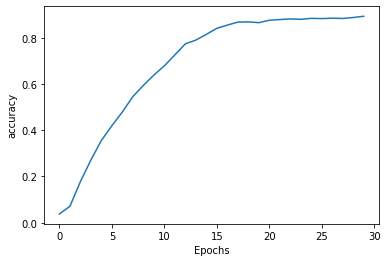

In [7]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'accuracy')    

In [12]:
seed_text = "Khushi Ko Na Nazar Laga"
next_words = 20
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Khushi Ko Na Nazar Laga tu sawan aaya hai tere intezar mein ho rahe jane ko lage ho jaayenge meri aadaton mein ko pehle ko lage ho ko ko mein rahe pehle kayi ko baat
